In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error




In [178]:
dataset = pd.read_csv("Housing.csv")
dataset.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


In [179]:
le = LabelEncoder()
dataset["mainroad"] = le.fit_transform(dataset["mainroad"])
dataset["guestroom"] = le.fit_transform(dataset["guestroom"])
dataset["basement"] = le.fit_transform(dataset["basement"])
dataset["hotwaterheating"] = le.fit_transform(dataset["hotwaterheating"])
dataset["airconditioning"] = le.fit_transform(dataset["airconditioning"])
dataset["prefarea"] = le.fit_transform(dataset["prefarea"])
dataset["furnishingstatus"] = le.fit_transform(dataset["furnishingstatus"])



In [180]:
dataset.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,1,0,0,0,1,2,1,0,13300000
1,8960,4,4,4,1,0,0,0,1,3,0,0,12250000
2,9960,3,2,2,1,0,1,0,0,2,1,1,12250000
3,7500,4,2,2,1,0,1,0,1,3,1,0,12215000
4,7420,4,1,2,1,1,1,0,1,2,0,0,11410000


In [181]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   area              545 non-null    int64
 1   bedrooms          545 non-null    int64
 2   bathrooms         545 non-null    int64
 3   stories           545 non-null    int64
 4   mainroad          545 non-null    int64
 5   guestroom         545 non-null    int64
 6   basement          545 non-null    int64
 7   hotwaterheating   545 non-null    int64
 8   airconditioning   545 non-null    int64
 9   parking           545 non-null    int64
 10  prefarea          545 non-null    int64
 11  furnishingstatus  545 non-null    int64
 12  price             545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


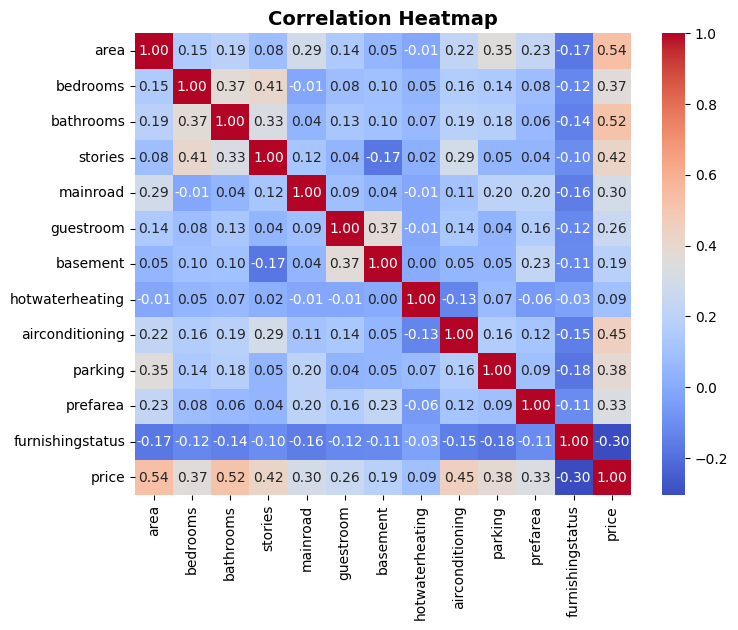

In [182]:
plt.figure(figsize=(8, 6))  # Adjust size
sns.heatmap(dataset.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=14, fontweight="bold")
plt.show()


In [183]:
x = dataset.iloc[:,:-1]
y = dataset["price"]


In [184]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [185]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,-1.406286
1,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,-1.406286
2,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,-0.091662
3,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,-1.406286
4,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,-1.406286
...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.991879,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035,1.222962
541,-1.268613,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-0.091662
542,-0.705921,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,1.222962
543,-1.033389,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-1.406286


In [186]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [187]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100

64.94754192267793

In [188]:
print(mean_squared_error(y_test, lr.predict(x_test)))
print(mean_absolute_error(y_test, lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))

1771751116594.0408
979679.6912959907
1331071.4167895128


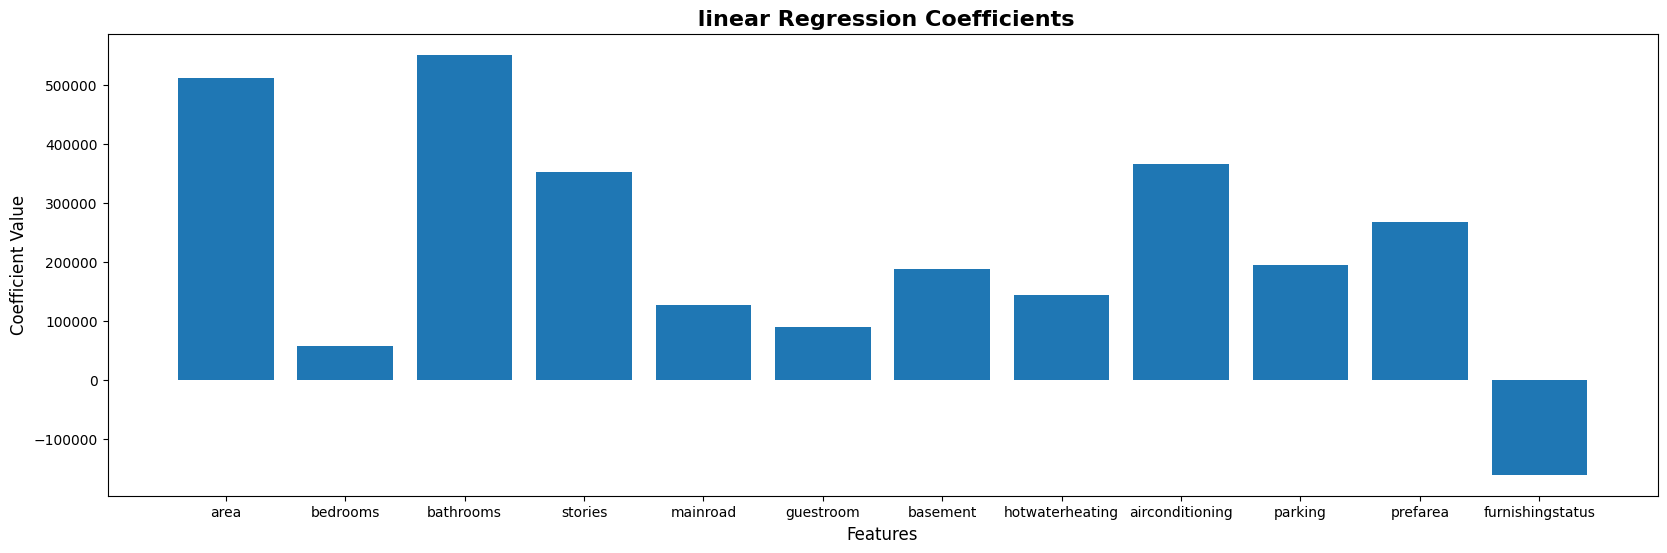

In [189]:
plt.figure(figsize=(20, 6))
plt.title(" linear Regression Coefficients", fontsize=16, fontweight="bold")
plt.xlabel("Features", fontsize=12)
plt.ylabel("Coefficient Value", fontsize=12)
plt.bar(x.columns, lr.coef_)
plt.show()

# Lasso

In [190]:
la = Lasso(alpha=0.01)
la.fit(x_train, y_train)
la.score(x_test, y_test) * 100


64.94754157663228

In [ ]:
print(mean_squared_error(y_test, la.predict(x_test)))
print(mean_absolute_error(y_test, la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, la.predict(x_test))))

1771751134085.1614
979679.6943421527
1331071.423359829


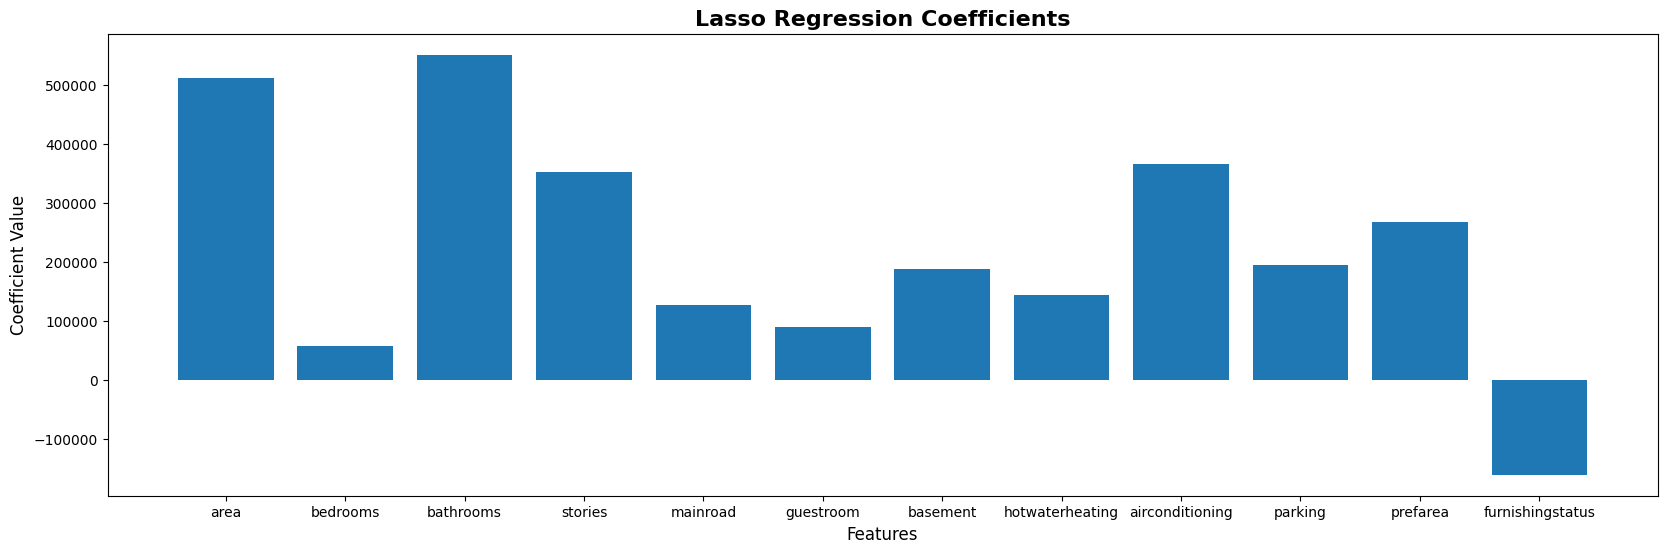

In [192]:
plt.figure(figsize=(20, 6))
plt.title("Lasso Regression Coefficients", fontsize=16, fontweight="bold")
plt.xlabel("Features", fontsize=12)
plt.ylabel("Coefficient Value", fontsize=12)
plt.bar(x.columns, la.coef_)
plt.show()

# Ridge

In [193]:
ri = Ridge(alpha=1)
ri.fit(x_train, y_train)
ri.score(x_test, y_test) * 100




64.93744489144322

In [195]:
print(mean_squared_error(y_test, ri.predict(x_test)))
print(mean_absolute_error(y_test, ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, ri.predict(x_test))))

1772261478130.5957
979508.3189731662
1331263.1137872767


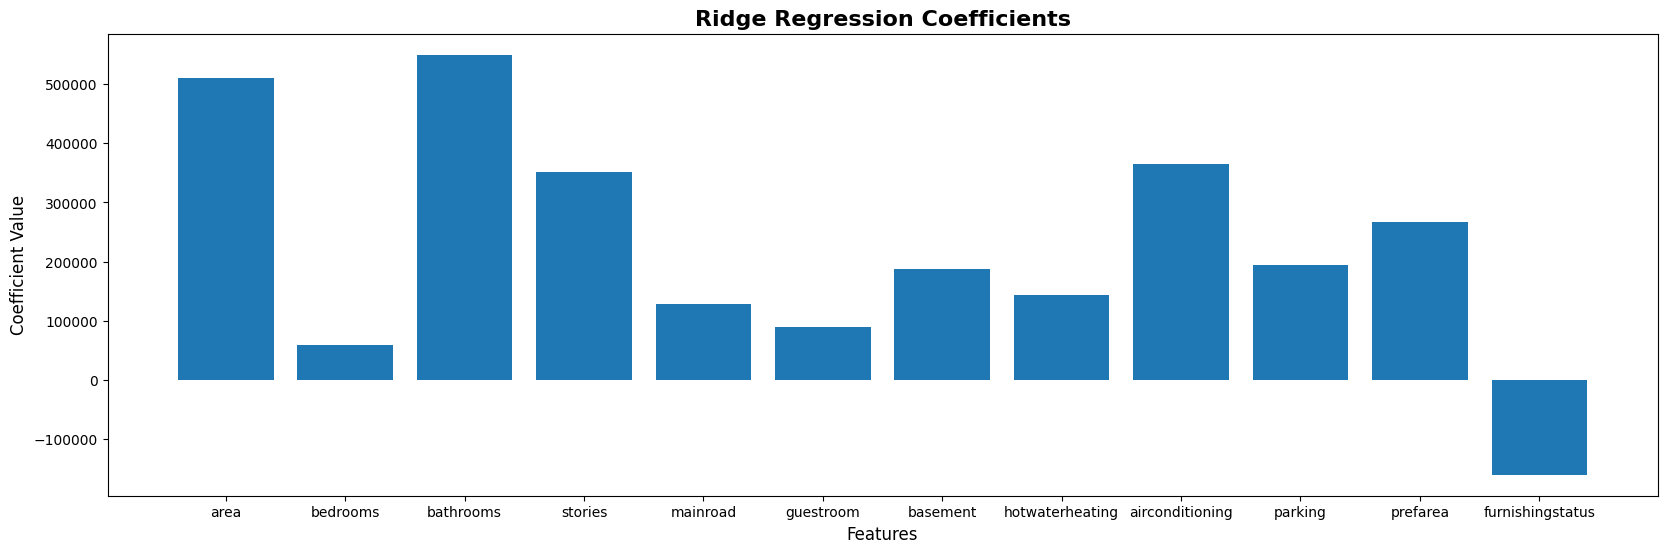

In [196]:
plt.figure(figsize=(20, 6))
plt.title("Ridge Regression Coefficients", fontsize=16, fontweight="bold")
plt.xlabel("Features", fontsize=12)
plt.ylabel("Coefficient Value", fontsize=12)
plt.bar(x.columns, ri.coef_)
plt.show()

In [ ]:
df = pd.DataFrame({"Col_name": x.columns,"liner Regression":lr.coef_, "Lasso Coefficients": la.coef_, "Ridge Coefficients": ri.coef_})
df

,Col_name,liner Regression,Lasso Coefficients,Ridge Coefficients
0,area,511355.314864,511355.312928,510384.665822
1,bedrooms,57939.764185,57939.762105,58838.284209
2,bathrooms,550762.108735,550762.105148,549534.901192
3,stories,352072.086344,352072.080132,351291.706306
4,mainroad,127770.253636,127770.248969,128020.103027
5,guestroom,89178.007942,89178.004241,89533.819047
6,basement,187581.884388,187581.878048,187044.410987
7,hotwaterheating,143909.241493,143909.232038,143587.270724
8,airconditioning,365086.933939,365086.929855,364702.091424
9,parking,194330.065331,194330.061063,194449.065841
